In [1]:
%matplotlib inline
from __future__ import division
import numpy as np

import os
import sys
import datetime
from subprocess import call
import subprocess
import glob
import djPyi2 as DJ

import pandas as pd
import csv
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import copy 
import pybedtools as pbt
import ciepy
import cardipspy as cpy
import networkx as nx
from djPyi2 import mpltools
from mpl_toolkits.axes_grid1 import  make_axes_locatable

import matplotlib.patches as patches

from djPyi2 import Common as CM

In [3]:
from matplotlib_venn import venn2, venn2_circles, venn3, venn3_circles

In [4]:
import vapeplot

In [163]:
dy_name = 'Figures_ASHG_Poster'

private_out = os.path.join(DJ.root, 'private_output', dy_name)
if not os.path.exists(private_out):
    cpy.makedir(private_out)

In [ ]:

combined_non_redun_info = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/combine_mc_variant_info/combined_non_redun_info_new.pkl')
color_dict_var_classes = dict(zip(combined_non_redun_info.SVTYPE.unique().tolist() + ['STR'], 
                                  sns.color_palette('hls', 10)))


In [615]:
df = pd.DataFrame(index = color_dict_var_classes.keys())

In [617]:
df['SVTYPE'] = df.index

In [618]:
df['colors']= df.SVTYPE.apply(lambda x: color_dict_var_classes[x])

In [620]:
CM.save_dataframe('color_pal_svtypes_df', df, private_out)

color_pal_svtypes_df = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/color_pal_svtypes_df.pkl')
color_pal_svtypes_df = pd.read_csv('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/color_pal_svtypes_df.tsv', sep='\t')
# all vars recorded: /frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/load_pickled_nb_variables.py


In [612]:
color_dict_var_classes.values()

[(0.4752000000000003, 0.33999999999999997, 0.86),
 (0.7871999999999999, 0.33999999999999997, 0.86),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.86, 0.5792000000000002),
 (0.41279999999999994, 0.86, 0.33999999999999997),
 (0.86, 0.33999999999999997, 0.6207999999999999),
 (0.7247999999999999, 0.86, 0.33999999999999997),
 (0.86, 0.3712, 0.33999999999999997),
 (0.33999999999999997, 0.5167999999999995, 0.86),
 (0.86, 0.6832, 0.33999999999999997)]

# STUDY INFO

In [373]:
sample_info = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/sample_info_combined/sample_info.pkl')

# data via ipscore_sample_info.ipynb
ipscore_info = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/ipscore_sample_info/ipscore_info.pkl')

# iPSC samples are redundant with Fibroblast samples in HipSci- select the non-iPSC
tdf = sample_info[sample_info.CELL_TYPE != 'iPSC']

# silence slice warnings with copy
tdf = copy.deepcopy(tdf)
tdf.sort_values('age_rank', inplace=True)

# family sizes iPSCORE
f_df =  ipscore_info['iPSCORE_FAMID'].value_counts().to_frame()
gdf = tdf.groupby('SEX')['AGE-RANGE'].value_counts().to_frame(name = 'frequency').reset_index()
gdf2 =  tdf.groupby(['SEX', 'STUDY'])['AGE-RANGE'].value_counts().to_frame(name = 'frequency').reset_index()

In [401]:
mpl.rcParams['axes.labelpad'] = 2
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['font.size'] = 15


mpl.gridspec.rcParams['axes.labelpad'] = 2
mpl.gridspec.rcParams['axes.titlesize'] = 18
mpl.gridspec.rcParams['axes.labelsize'] = 16
mpl.gridspec.rcParams['ytick.labelsize'] = 14
mpl.gridspec.rcParams['xtick.labelsize'] = 14
mpl.gridspec.rcParams['axes.labelweight'] = 'bold'
mpl.gridspec.rcParams['legend.fontsize'] = 15

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (15,8), facecolor = 'white')
ax = axes[0]

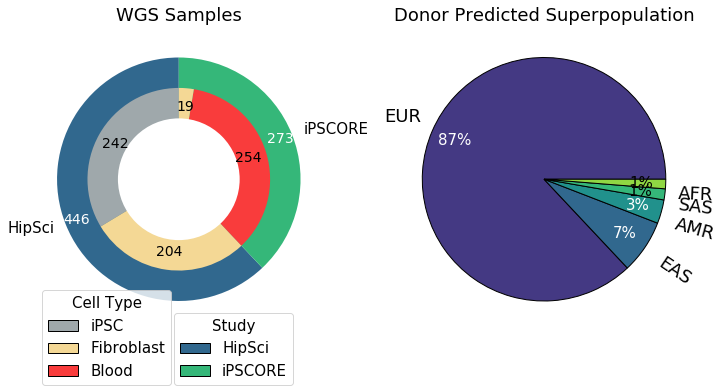

In [826]:
fig, axes = plt.subplots(1,2, figsize = (12,8), facecolor = 'white')
ax = axes[0]

tdf = sample_info[sample_info.STUDY !='HLI']
labels_outer = tdf['STUDY'].value_counts().keys().tolist()
sizes = tdf['STUDY'].value_counts().tolist()
colors_outer = sns.color_palette('viridis', n_colors=len(labels_outer))

patches, texts, autotext = ax.pie(sizes, labels= labels_outer, startangle=90, pctdistance=0.9, colors=colors_outer, autopct='%s')

for ind, i in enumerate(autotext):
    i.set_text(sizes[ind])
    i.set_size(14)
    i.set_color('w')

for ind, i in enumerate(texts):
    i.set_size(15)

df = tdf.groupby('STUDY').CELL_TYPE.value_counts().to_frame('counts').reset_index()
sizes = df['counts'].tolist()
labels = df.CELL_TYPE.tolist()

unique_labs = list(set(labels))
colorpal = sns.color_palette('Blues', n_colors=len(unique_labs))
colorpal = ['#9fa8ab', '#f4d895','#f93c3c']

colorsDict = dict(zip(unique_labs, colorpal))
colors = [colorsDict[i] for i in labels]

patches, texts, autotext = ax.pie(sizes, colors=colors, radius=0.75, startangle=90, autopct='%s', pctdistance=0.8)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
ax.add_artist(centre_circle)

for ind, i in enumerate(autotext):
    i.set_text(sizes[ind])
    i.set_size(14)
    i.set_color('black')

for ind, i in enumerate(texts):
    i.set_size(18)

patches = mpltools.get_legend_patches(unique_labs, rectfacecolor=colorpal, just_rect=True)
leg1  = ax.legend(handles = patches, bbox_to_anchor = [0.5, -0.2], loc = 'lower right', title = 'Cell Type')
ax.add_artist(leg1)

patches = mpltools.get_legend_patches(labels_outer, rectfacecolor=colors_outer, just_rect=True)
leg2  = ax.legend(handles = patches, bbox_to_anchor = [0.9, -0.2], loc = 'lower right', title ='Study')

ax.set_title('WGS Samples')
ax.set_aspect('equal')

ax = axes[1]

tdf = tdf[tdf.CELL_TYPE != 'iPSC']
labels =tdf['GENETICALLY_SIMILAR_POPULATION_GROUP'].value_counts().keys()
sizes = tdf['GENETICALLY_SIMILAR_POPULATION_GROUP'].value_counts()
colors = sns.color_palette('viridis', n_colors=len(labels))
#     explode = [0.12, 0.12, 0.12, 0.12, 0.12, 0.12]

patches, texts, autotext= ax.pie(sizes, labels= labels, pctdistance=0.8,
                           autopct='%.0f%%', colors = colors, rotatelabels=True)


for patch in patches:
    patch.set_edgecolor('black')

t = texts[0]
t.set_rotation(0)
for i in autotext[0:3]:
#     i.set_size(10)
    i.set_color('w')

for i in autotext[3:]:
#     i.set_size(8)
    i.set_color('black')
    
    
for ind, i in enumerate(texts):
    i.set_size(18)

ax.set_title('Donor Predicted Superpopulation')
ax.set_aspect('equal')
fn = private_out + '/Dataset_Subject_Info.png'
fig.savefig(fn, bbox_inches = 'tight', dpi = 500)


In [809]:
tdf = tdf.sort_values('age_rank')

In [810]:
labels = tdf['AGE-RANGE'].unique()
indexes = tdf['age_rank'].unique()
ticklabels = [labels[i-1] for i in indexes]
    

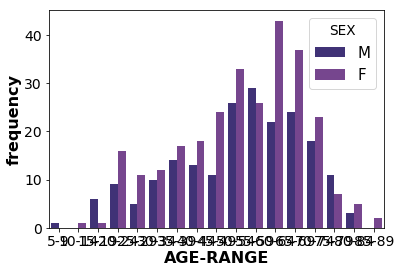

In [811]:

sns.barplot(x = 'AGE-RANGE', y= 'frequency', hue = 'SEX', hue_order=['M', 'F'], order=ticklabels, data=gdf)

In [817]:
picard = '/frazer01/projects/hipsci/pipeline/WGS/MELT_V2/coverage_all.txt'

dfcov = pd.read_table(picard, names=['ID', 'ref', 'coverage'])

def collection(x):
    try: 
        x.split('.')[1]
        return 'iPSCORE'
    except:
        return 'HipSci'

dfcov['collection'] = dfcov.ID.apply(lambda x: collection(x))
dfcov['coverage'] = dfcov.coverage.astype(int)

In [967]:
dfcov.groupby('collection').coverage.describe()

,count,mean,std,min,25%,50%,75%,max
collection,,,,,,,,
HipSci,446.0,36.591928,6.027229,20.0,35.0,38.0,39.0,78.0
iPSCORE,274.0,50.459854,12.379538,35.0,43.0,47.5,54.0,124.0


In [971]:
dfcov[dfcov.ID != 'HuRef.mdup'].groupby('collection').coverage.describe()

,count,mean,std,min,25%,50%,75%,max
collection,,,,,,,,
HipSci,446.0,36.591928,6.027229,20.0,35.0,38.0,39.0,78.0
iPSCORE,273.0,50.446886,12.400409,35.0,43.0,47.0,54.0,124.0


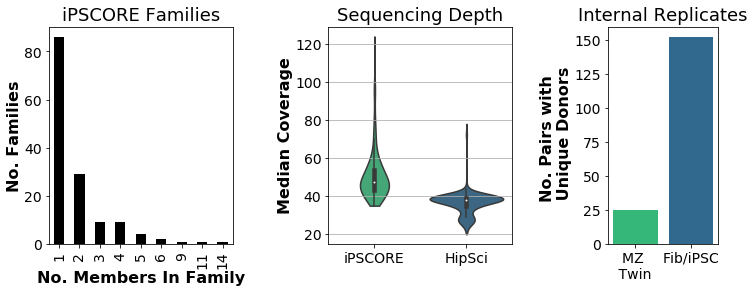

In [918]:
fig =plt.figure(figsize=(12,4),  facecolor='white')
gs = mpl.gridspec.GridSpec(1, 3, hspace=0.6, wspace=0.6, width_ratios=[1,1,0.6])
# ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[0, 0])
ax3 = fig.add_subplot(gs[0,1])
ax4 = fig.add_subplot(gs[0,2])


f_df.iPSCORE_FAMID.value_counts().sort_index().plot(kind='bar', ax=ax2, color= 'black')
ax2.set_xlabel('No. Members In Family')
ax2.set_ylabel('No. Families')



pal = {'F': (0.7058823529411765, 0.48627450980392156, 0.7803921568627451),
       'M': (0.4666666666666667, 0.7450980392156863, 0.8588235294117647)}

sns.barplot(x = 'AGE-RANGE', y= 'frequency', hue = 'SEX', hue_order=['M', 'F'], order=ticklabels, data=gdf, ax = ax1, palette= pal)
#     ax.set_xticklabels(ticklabels)
ax1.set_xlabel('AGE-RANGE')
ax1.set_ylabel('frequency')
ax1.set_title('i2QTL (iPSCORE + HipSci)')
ax1.tick_params(axis = 'x', labelrotation=45)
pal_study = {'HipSci': colors_outer[0], 'iPSCORE': colors_outer[1]}
sns.violinplot(x = 'collection', y = 'coverage', data = dfcov, cut = 0, ax = ax3, palette= pal_study)
    
ax3.set_ylabel('Median Coverage')
ax3.set_xlabel('')
ax3.yaxis.grid()
ax1.yaxis.grid()

ax2.set_title('iPSCORE Families')
ax3.set_title('Sequencing Depth')
ax4.bar(1, 25, color = pal_study['iPSCORE'])
ax4.bar(2, 152, color = pal_study['HipSci'])
ax4.set_xticklabels(['','MZ \n Twin ', 'Fib/iPSC'])
ax4.set_ylabel('No. Pairs with \n Unique Donors')
ax4.set_title('Internal Replicates')
fn = private_out + '/Dataset_Subject_Info_Gender_Cov.png'
fig.savefig(fn, bbox_inches = 'tight', dpi = 500)

In [933]:
Variants_Per_Caller_NR[Variants_Per_Caller_NR.SVTYPE.isin(['DUP', 'DEL', 'mCNV'])].groupby(['Has_SS', 'Site_Evidence'])['Num Variants'].sum()

Has_SS  Site_Evidence
False   GS                3881
        GS,GS_LCNV          87
        GS_LCNV            190
True    GS,GS_LCNV,SS      124
        GS,SS             6304
        GS_LCNV,SS          49
        SS               10683
Name: Num Variants, dtype: int64

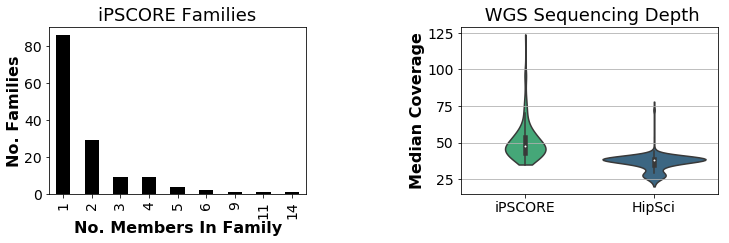

In [900]:
fig =plt.figure(figsize=(12,8),  facecolor='white')
gs = mpl.gridspec.GridSpec(2, 2, hspace=0.6, wspace=0.6)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1,1])



f_df.iPSCORE_FAMID.value_counts().sort_index().plot(kind='bar', ax=ax2, color= 'black')
ax2.set_xlabel('No. Members In Family')
ax2.set_ylabel('No. Families')



pal = {'F': (0.7058823529411765, 0.48627450980392156, 0.7803921568627451),
       'M': (0.4666666666666667, 0.7450980392156863, 0.8588235294117647)}

sns.barplot(x = 'AGE-RANGE', y= 'frequency', hue = 'SEX', hue_order=['M', 'F'], order=ticklabels, data=gdf, ax = ax1, palette= pal)
#     ax.set_xticklabels(ticklabels)
ax1.set_xlabel('AGE-RANGE')
ax1.set_ylabel('frequency')
ax1.set_title('i2QTL (iPSCORE + HipSci)')
ax1.tick_params(axis = 'x', labelrotation=45)
pal_study = {'HipSci': colors_outer[0], 'iPSCORE': colors_outer[1]}
sns.violinplot(x = 'collection', y = 'coverage', data = dfcov, cut = 0, ax = ax3, palette= pal_study)
    
ax3.set_ylabel('Median Coverage')
ax3.set_xlabel('')
ax3.yaxis.grid()
ax1.yaxis.grid()

ax2.set_title('iPSCORE Families')
ax3.set_title(['Sequencing Depth'])
fn = private_out + '/Dataset_Subject_Info_Gender_Cov.png'
fig.savefig(fn, bbox_inches = 'tight', dpi = 500)


# GENERAL SUMMARY OF NON REDUNDANT SET BY CALLER

In [847]:
Variants_Per_Caller_NR = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/combine_mc_variant_info/Variants_Per_Caller_NR.pkl')

df_counts = Variants_Per_Caller_NR.groupby(['SVTYPE', 'Site_Evidence'])['Num Variants'].sum().to_frame('Counts').reset_index()
df_counts_gs_ss_lcnv = df_counts[~df_counts.Site_Evidence.isin(['MELT', 'HipSTR'])].copy()
convert_cats = {'GS':'100', 'GS,SS': '110', 'GS,GS_LCNV,SS': '111', 'GS_LCNV,SS': '011', 'SS':'010', 'GS_LCNV':'001', 'GS,GS_LCNV':'101'}
df_counts_gs_ss_lcnv['set_label'] = df_counts_gs_ss_lcnv.Site_Evidence.apply(lambda x: convert_cats[x])
set_all = df_counts_gs_ss_lcnv.groupby('set_label').Counts.sum().to_dict()
svtypes = ['DEL', 'DUP', 'mCNV']

/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: 'SVTYPE' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version
  app.launch_new_instance()


In [848]:
# HELPFUL COLS FOR GROUPING THE SUMMARY TABLE
Variants_Per_Caller_NR['Has_GS'] = Variants_Per_Caller_NR.Site_Evidence.apply(lambda x: 'GS' in set(x.split(',')))
Variants_Per_Caller_NR['Has_SS'] = Variants_Per_Caller_NR.Site_Evidence.apply(lambda x: 'SS' in set(x.split(',')))

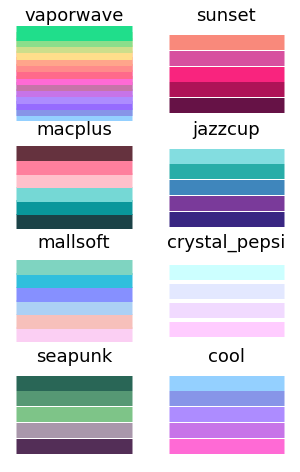

In [861]:
for_stacked_bar = pd.pivot_table(Variants_Per_Caller_NR, index=['SVTYPE'], values = ['Num Variants'], columns = ['Site_Evidence'])
for_stacked_bar.columns = for_stacked_bar.columns.droplevel()

for_stacked_bar_frac = for_stacked_bar.copy()
for_stacked_bar_frac['total'] = for_stacked_bar.sum(axis =1)
for_stacked_bar_frac = for_stacked_bar_frac.fillna(0)

cols = 'GS	GS_LCNV GS,GS_LCNV	GS,GS_LCNV,SS	GS,SS GS_LCNV,SS	SS 	HipSTR	MELT'.split()

pal_combined = vapeplot.palette('jazzcup') + vapeplot.palette('seapunk')
pal = dict(zip(cols, pal_combined))
pal['HipSTR'] = '#a2b9bc'
order_variants = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'STR', 'BND']
color = [pal[i] for i in cols]

for c in cols:
    for_stacked_bar_frac[c] = for_stacked_bar[c]/for_stacked_bar_frac['total']
for_stacked_bar_frac = for_stacked_bar_frac.fillna(0)
# total counts for side bar
total_counts = Variants_Per_Caller_NR.groupby('SVTYPE')['Num Variants'].sum().to_frame('Counts').loc[order_variants]
total_counts['log_counts'] = np.log10(total_counts['Counts'])

/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:20: FutureWarning: 'SVTYPE' is both a column name and an index level.
Defaulting to column but this will raise an ambiguity error in a future version


In [762]:
pal_callers = pd.Series(pal)

In [764]:
CM.save_dataframe('pallete_variant_callers', pal_callers, private_out)

pallete_variant_callers = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/pallete_variant_callers.pkl')
pallete_variant_callers = pd.read_csv('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/pallete_variant_callers.tsv', sep='\t')
# all vars recorded: /frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/load_pickled_nb_variables.py


In [388]:
mpl.rcParams['axes.labelpad'] = 2
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['axes.labelweight'] = 'bold'
mpl.gridspec.rcParams['axes.labelpad'] = 2
mpl.gridspec.rcParams['axes.titlesize'] = 18
mpl.gridspec.rcParams['axes.labelsize'] = 16
mpl.gridspec.rcParams['ytick.labelsize'] = 14
mpl.gridspec.rcParams['xtick.labelsize'] = 14
mpl.gridspec.rcParams['axes.labelweight'] = 'bold'

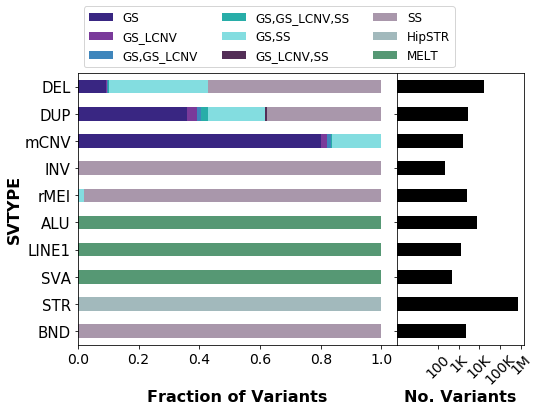

In [475]:
fig = plt.figure(figsize = (8,5))
gs= mpl.gridspec.GridSpec(1, 2, width_ratios=[1, 0.4], wspace=0)
ax1 =  fig.add_subplot(gs[0])

for_stacked_bar_frac.loc[reversed(order_variants)][cols].plot(kind= 'barh', stacked = True, color = color, ax = ax1)
leg = ax1.legend(bbox_to_anchor = [0,1], loc = 'lower left', ncol=3, fontsize = 12)


ax2 = fig.add_subplot(gs[1])
ax2.set_ylim(ax1.get_ylim())
start = ax1.get_ylim()[1] - 0.5
for svtype in order_variants:
    ax2.barh(start, total_counts.loc[svtype]['log_counts'], 0.5, color= 'black')
    start = start -1
    
# start = ax1.get_ylim()[1] - 0.5
# for svtype in order_variants:
#     ax1.text(1.1, start, "{:,}".format(total_counts.loc[svtype]['Counts'].astype(int)), color= 'black',
#             verticalalignment='center')
#     start = start -1
    
# ax1.set_xlim(0,1.4)
    
xticks = np.log10([100, 1000, 10000, 100000, 1000000])
xticklab = ['100', '1K', '10K', '100K', '1M']

ax2.set_xticks(xticks)
ax2.set_xticklabels(xticklab, rotation = 45)
ax2.set_yticklabels([])
ax2.set_xlabel('No. Variants')
ax1.set_xlabel('Fraction of Variants')
ax1.tick_params(axis = 'y', labelsize=15)

fig.align_xlabels()

fn = private_out + '/Intersections_Non-Redundant_Barplot.png'
fig.savefig(fn, dpi = 500)




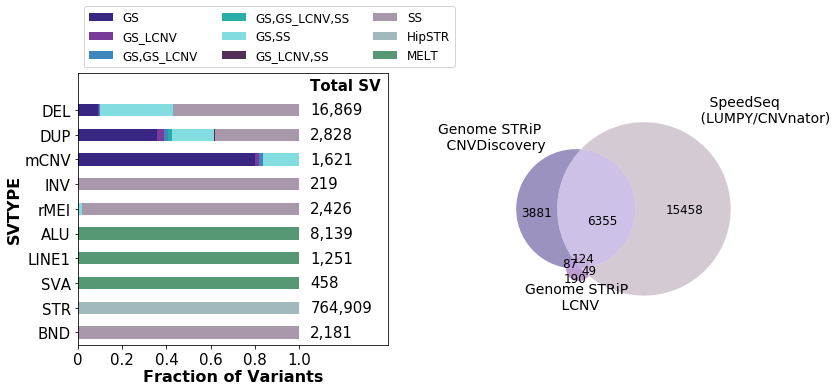

In [878]:
fig = plt.figure(figsize = (12,5))
gs= mpl.gridspec.GridSpec(1, 2, width_ratios=[1, 0.8], wspace=0.4)
ax1 =  fig.add_subplot(gs[0])

for_stacked_bar_frac.loc[reversed(order_variants)][cols].plot(kind= 'barh', stacked = True, color = color, ax = ax1)
leg = ax1.legend(bbox_to_anchor = [0,1], loc = 'lower left', ncol=3, fontsize = 12)


ax2 = fig.add_subplot(gs[1])
v = venn3(set_all, set_labels= ['Genome STRiP \n CNVDiscovery', '     SpeedSeq \n   (LUMPY/CNVnator)', 'Genome STRiP \n LCNV'], set_colors=colors, ax= ax2, alpha = 0.5)


for text in v.subset_labels:
    try:
        text.set_fontsize(12)
    except:
        pass
    
for text in v.set_labels:
    try:
        text.set_fontsize(14)
    except:
        pass


start = ax1.get_ylim()[1] - 0.5
for svtype in order_variants:
    ax1.text(1.05, start, "{:,}".format(total_counts.loc[svtype]['Counts'].astype(int)), color= 'black',
            verticalalignment='center')
    start = start -1
    
ax1.set_xlim(0,1.4)
ylims = ax1.get_ylim()
ymin, ymax = min(ylims), max(ylims) + 1
ax1.set_ylim(ymin, ymax)
    
ax1.text(1.05,ymax-0.5, 'Total SV', color= 'black', weight='bold', verticalalignment='center')

xticks = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticks)

fig.align_xlabels()
ax1.set_xlabel('Fraction of Variants')
ax1.tick_params(axis = 'both', labelsize=15)

fn = private_out + '/Intersections_Non-Redundant_Barplot_Numbered.png'
fig.savefig(fn, dpi = 500, bbox_inches = 'tight')



/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


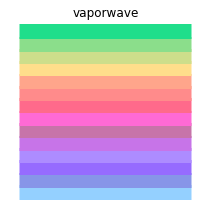

In [16]:
vapeplot.view_palette('vaporwave')

In [146]:
vaporwave_pal = vapeplot.palette('vaporwave')
vapeplot.palette('vaporwave')

['#94D0FF',
 '#8795E8',
 '#966bff',
 '#AD8CFF',
 '#C774E8',
 '#c774a9',
 '#FF6AD5',
 '#ff6a8b',
 '#ff8b8b',
 '#ffa58b',
 '#ffde8b',
 '#cdde8b',
 '#8bde8b',
 '#20de8b']

In [868]:
sum_ss = Variants_Per_Caller_NR.groupby('Has_SS')['Num Variants'].sum()[True]
sum_melt = Variants_Per_Caller_NR[Variants_Per_Caller_NR.Site_Evidence == 'MELT']['Num Variants'].sum()

#set for lumpy melt just to properly scale the Venn
sets_melt_lumpy = {'10':sum_ss, '11':0, '01': sum_melt}
colors = ['#94D0FF', '#8bde8b', '#966bff']
colors = [pal[i] for i in ['GS', 'SS', 'GS_LCNV']]
color_melt= ['#ff8b8b']

<matplotlib_venn._common.VennDiagram instance at 0x7f893f20a098>

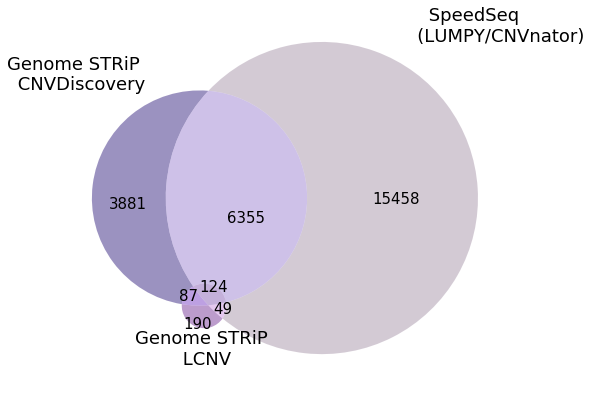

In [870]:

fig, ax = plt.subplots(1, 1, figsize = (8,8))

venn3(set_all, set_labels=
      ['Genome STRiP \n CNVDiscovery', 
       '     SpeedSeq \n   (LUMPY/CNVnator)', 'Genome STRiP \n LCNV'],
      set_colors=colors, ax= ax, alpha = 0.5)

# Version 3. Make a Proportionally sized Circle Also to Represent Melt?

In [157]:
sum_ss = Variants_Per_Caller_NR.groupby('Has_SS')['Num Variants'].sum()[True]
sum_melt = Variants_Per_Caller_NR[Variants_Per_Caller_NR.Site_Evidence == 'MELT']['Num Variants'].sum()
overlap = sum_ss - set_all['010']
#set for lumpy melt just to properly scale the Venn
sets_melt_lumpy = {'01':sum_ss-overlap, '11':overlap, '10': sum_melt-overlap}

sets_melt_lumpy = {'01':0, '11':0, '10': sum_melt}

colors = ['#94D0FF', '#8bde8b', '#966bff']
color_melt = ['#ff8b8b']

In [159]:
color_pal_callers = {'GS': '#94D0FF', 'SS': '#8bde8b', 'GS_LCNV': '#966bff', 'MELT': '#ff8b8b'}

In [131]:
frac_shrink = (sum_melt/sum_ss) * 2

melt_numbers = Variants_Per_Caller_NR.loc[['ALU', 'LINE1', 'SVA']]['Num Variants'].to_dict()

melt_numbers['Total'] = sum(melt_numbers.values())

0


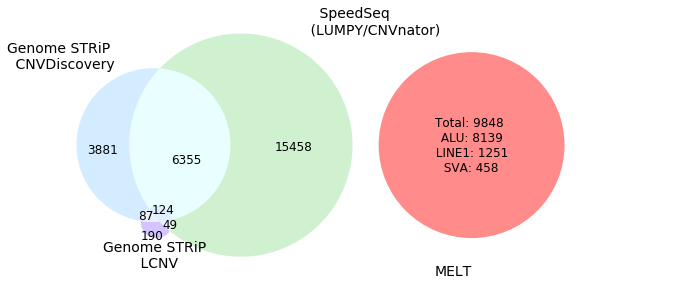

In [372]:
fig, axes = plt.subplots(1,2,  figsize = (9,4))
ax1 = axes[0]

colors = [color_pal_callers[s] for s in ['GS', 'SS', 'GS_LCNV']]
v = venn3(set_all, set_labels= ['Genome STRiP \n CNVDiscovery', '     SpeedSeq \n   (LUMPY/CNVnator)', 'Genome STRiP \n LCNV'], set_colors=colors, ax= ax1)

rad_lumpy = v.get_circle_radius(1)

rad_melt = rad_lumpy * frac_shrink

ax2 = axes[1]

pos = ax1.get_position()
# ax2.set_position(pos)

v2 = venn2(sets_melt_lumpy, set_colors = [color_pal_callers['MELT'], 'b'] ,set_labels=[ 'MELT', ''], ax= ax2, alpha = 1)
v2.hide_zeroes()
p = v2.get_patch_by_id('A')
p.set_radius(rad_melt)

for text in v2.subset_labels:
    try:
        t  = text.get_text()
        if t == '0':
            print t
        else:
            new_lab = 'Total: {} \n ALU: {} \n LINE1: {} \n SVA: {} '.format(melt_numbers['Total'],
                                                                             melt_numbers['ALU'],
                                                                             melt_numbers['LINE1'],
                                                                             melt_numbers['SVA'])
            
            text.set_text(new_lab)
            text.set_fontsize(12)
            
        
    except:
        pass
    
for text in v2.set_labels:
    try:
        text.set_fontsize(14)
        
    except:
        pass
    

for text in v.subset_labels:
    try:
        text.set_fontsize(12)
    except:
        pass
    
for text in v.set_labels:
    try:
        text.set_fontsize(14)
    except:
        pass
  
    
# for text in out.subset_labels:
#     text.set_fontsize(16)

plt.tight_layout(w_pad=-5)

fn = private_out + '/Intersections_Non-Redundant_Venn.png'
fig.savefig(fn, dpi = 500, bbox_inches = 'tight')



# Callset Overlap with Other Datasets

In [580]:
def corr_plot(ax, corr_per_class_all, order_variants):
    ax = sns.pointplot(x="corr_coef", y="SVTYPE", hue = 'Data Set', order=order_variants, ci=None, 
                       dodge = 0.3, join = False, markers = ['x', 'o'], color = 'black', data=corr_per_class_all, 
                       ax = ax, scale = 0.6)
    leg = ax.legend(bbox_to_anchor = [1,1], loc = 'upper left')

    lines = np.arange(-.5, 10.5, 1)[:-1]
    for i in lines:
        ax.axhline(i, 0,1, color = 'black')


    ymin, ymax = ax.get_ylim()
    xmin, xmax =ax.get_xlim()

#     start = -0.5
#     for v in order_variants[:-1]:
#         end = start + 1
#         c = color_dict[v]
#         ax.fill_between((xmin, xmax), start, end, zorder = 0, color = c)
#         start = end
    ax.set_xlim(xmin, xmax)
#     ax.set_ylim(8.5, -1)
    ax.set_xlabel('Correlation ($r$) \n NONREF AF ')
    ax.grid(axis = 'x')
    
    return ax
def stacked_bar_plot_co_disc(frac_disc_gtex_1kgp, order, ax, colors):
    order = reversed(order)
    ax = frac_disc_gtex_1kgp.loc[order][['Co-Discovered-1KGP', 'Co-Discovered-All', 'Co-Discovered-GTEx', 'Novel']].plot(kind = 'barh', stacked = True, ax = ax, colors = colors,lw=1, ec = 'black')
    
    ax.legend(bbox_to_anchor = [-0.1,1],  ncol = 2, loc = 'lower left', fontsize = 10)
    
    
    order_rev = list(reversed(order_variants))
    df = frac_disc_gtex_1kgp.loc[order_variants]

    height = 8.5
    for i, x in df.iterrows():
        novel = x['num_Novel']
        per_novel = x['Novel']
        known = x['num_known']

        print i, per_novel
        x_max = 1
        x_min = 1- per_novel

        x_mid = x_min + ((x_max - x_min) / 2)

        ax.text(x_mid, height, "{:,}".format(int(novel)), verticalalignment = 'center', fontsize = 12)

        mid_known = x_min/2

        ax.text(mid_known, height, "{:,}".format(int(known)), verticalalignment = 'center', fontsize = 12)

        height -= 1

#     ax.set_ylim(-1, 8.5)
    
    ax.set_xlabel('Fraction of Variants')

    return ax

In [488]:
def prep_intersect(df):
    df = df.copy()
    df[['MAF', 'MAF_i2QTL_unrel']] = df[['MAF', 'MAF_i2QTL_unrel']].applymap(float)
    return df

In [489]:

def get_plot_elements(intersect_data_gtex_i2QTL):
    
    for_corr_gtex = intersect_data_gtex_i2QTL[intersect_data_gtex_i2QTL.Discovery_Status=='Co-Discovered']

    corr_for_plot_gtex = for_corr_gtex['MAF	MAF_i2QTL_unrel'.split()].corr().iloc[0, 1]

    corr_for_plot_gtex = round(corr_for_plot_gtex, 3)

    shared_vars_gtex= intersect_data_gtex_i2QTL[intersect_data_gtex_i2QTL.Discovery_Status == 'Co-Discovered']

    unique_to_i2_gtex = intersect_data_gtex_i2QTL[intersect_data_gtex_i2QTL.Discovery_Status == 'Unique_i2QTL']
    
    return for_corr_gtex, corr_for_plot_gtex, shared_vars_gtex, unique_to_i2_gtex


In [492]:
def add_size_binning(df, cat = 'SVLEN'):
    df = df.copy()

    size_bins = np.arange(0, 6, 0.2)
    df['log_length']= np.log10(df[cat] + 1)
    df['log_size_bins']=pd.cut(df.log_length, size_bins, labels=size_bins[1:], include_lowest=False)
    df['log_size_bins'] = df['log_size_bins'].astype(float)
    return df

In [491]:
def prep_info_dosage(df):
    df = df.copy()
    df = df[df.in_vcf == True]
    df = df.pipe(add_size_binning, cat = 'max_dosage_change')
    return df

In [943]:
def unique_id(df):
    df = df.copy()
    df['cat_id'] = df.SVTYPE + '_' + df.log_size_bins.apply(lambda x: round(x, 2)).astype(str)
    df.index = df.cat_id
    df.index.name = 'index'
    return df

def prep_rr_combined( combined_non_redun_info):
    combined_non_redun_info = combined_non_redun_info.copy()
    combined_rr = combined_non_redun_info[(combined_non_redun_info.number_pairs_with_var > 0) & (combined_non_redun_info.number_pairs_with_var > 3)].copy()
    
    combined_rr['replication_rate'] = combined_rr.replication_rate.astype(float)
    return combined_rr

def prep_vc_rr_by_length_comb(combined_rr):
    rr_by_length_comb = combined_rr[~((combined_rr.SVTYPE == 'LINE1') & (combined_rr.log_size_bins == 0.4))].groupby(['SVTYPE', 'log_size_bins']).replication_rate.mean().to_frame('RR').reset_index()

    num_by_length_comb = combined_rr.groupby(['SVTYPE', 'log_size_bins']).size().to_frame('count').reset_index()
    
    rr_by_length_comb['color'] = rr_by_length_comb.SVTYPE.apply(lambda x: color_dict[x])
    

    rr_by_length_comb  = rr_by_length_comb.pipe(unique_id)
    num_by_length_comb = num_by_length_comb.pipe(unique_id)
    rr_by_length_comb['num_sites'] = num_by_length_comb['count']
    return rr_by_length_comb

def prep_hipstr_vc_rr_by_length(info_dosage_hipstr):
    info_dosage_hipstr = info_dosage_hipstr.copy()
    num_by_length = info_dosage_hipstr.groupby(['SVTYPE','log_size_bins']).size().to_frame('count').reset_index()
    
    rr_by_length =  info_dosage_hipstr[info_dosage_hipstr.RR.isnull() == False].groupby(['SVTYPE','log_size_bins']).RR.mean().to_frame('RR').reset_index()
    
    rr_by_length['color'] = rr_by_length.SVTYPE.apply(lambda x: color_dict[x])
    return rr_by_length
    

def plot_length_rr(ax, rr_by_length_comb, rr_by_length_hipstr, color_dict, s = 8):
      
    for g, df in rr_by_length_comb.groupby('SVTYPE'):
        
        df = df.sort_values('log_size_bins')
        df = df[df['num_sites'] > 3]
        if df.shape[0] > 0:


            if g != 'BND':

                color_svtype = color_dict[g]
                ax.scatter(df['log_size_bins'], df['RR'], c = color_svtype, label=g, s= s)
                ax.plot(df['log_size_bins'], df['RR'], c = color_svtype, label = '_nolegend_')

    color_svtype = color_dict['STR']
    rr_by_length_hipstr = rr_by_length_hipstr.sort_values('log_size_bins')
    ax.scatter(rr_by_length_hipstr['log_size_bins'], rr_by_length_hipstr['RR'], c = color_svtype, label=g, s = s)
    

    ax.plot(rr_by_length_hipstr['log_size_bins'], rr_by_length_hipstr['RR'], c = color_svtype, label = '_nolegend_')

    
    xticks = list(np.log10([1, 10, 100, 1000, 10000, 100000, 1000000])) + [6.2]
    xlabels = ['1bp', '10bp', '100bp', '1kb', '10kb', '100kb', '1MB', '1MB+']
    

    
#     ylabels = ['1', '10', '100', '1kb', '10kb'
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=45)
    ax.set_ylim(0.5,1.05)

    ax.set(xlabel='SV Length', ylabel='Average RR')
    ax.grid()
    
    return ax

def plot_length_number(combined_non_redun_info, info_dosage_hipstr, color_dict, s = 8, ax = False):
    if not ax:
        fig, ax = plt.subplots(1,1, figsize= (12,5))
    vc = combined_non_redun_info.groupby('SVTYPE').log_size_bins.value_counts().to_frame('count').reset_index()
    vc['color'] = vc.SVTYPE.apply(lambda x: color_dict[x])
    vc['log_count'] = np.log10(vc['count'])
    
    
    for g, df in vc.groupby('SVTYPE'):
        df = df.sort_values('log_size_bins')
        df = df[df['count']>=1]
        
        if g == 'LINE1':
            df = df[df.log_size_bins != df.log_size_bins.min()]
        if g != 'BND':

            color_svtype = color_dict[g]
            ax.scatter(df['log_size_bins'], df['log_count'], c = color_dict[g], label=g, s= s)
            ax.plot(df['log_size_bins'], df['log_count'], c = color_svtype, label = '_nolegend_')
    
    
    
   
    vc_hipstr = info_dosage_hipstr.groupby('log_size_bins').size().to_frame('count').reset_index()
    vc_hipstr['log_count'] = np.log10(vc_hipstr['count'])
    vc_hipstr['color'] = [color_dict['STR'] for i in range(vc_hipstr.shape[0])]
    vc_hipstr = vc_hipstr.sort_values('log_size_bins')
    ax.scatter(vc_hipstr['log_size_bins'],  vc_hipstr['log_count'], c = vc_hipstr['color'], label = 'STR', s= s)
    ax.plot(vc_hipstr['log_size_bins'],  vc_hipstr['log_count'], c= color_dict['STR'], label = '_nolegend_')
    
    
    xticks = list(np.log10([1, 10, 100, 1000, 10000, 100000, 1000000])) + [6.2]
    xlabels = ['1bp', '10bp', '100bp', '1kb', '10kb', '100kb', '1MB', '1MB+']
    
    yticklabels = [1, 10, 100, 1000, 10000, 100000]
    yticks = np.log10(yticklabels)
    
    yticklabel_mod = [1,10, 100, '1K', '10K', '100K']
    
    ax.set_xticks(xticks)
    ax.set_xticklabels(xlabels, rotation=45)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticklabel_mod)
    ax.set(xlabel='SV Length', ylabel='No. Variants')
    ax.grid()
    
    return ax

def plot_maf(ax, combined_non_redun_info, info_dosage_hipstr):
    for i, df in combined_non_redun_info.groupby('SVTYPE'):
        color_svtype = color_dict[i]
        sns.kdeplot(df.MAF_i2QTL_unrel, color= color_svtype, ax = ax, bw =0.02, label = i, legend = False)
#         ax.legend(bbox_to_anchor = (1,1), loc = 'upper left')

    color_svtype = color_dict['STR']
    sns.kdeplot(info_dosage_hipstr[info_dosage_hipstr.MAF_i2QTL_unrel > 0].MAF_i2QTL_unrel, color = color_svtype, ax = ax, bw = 0.02, label = 'STR', legend= False)
    ax.set_yscale('log')
    ax.set_yticks([1,10])
    ax.set_ylim(0.2)
    ax.set_yticklabels([1,10])

    xticks = [0.01, 0.05, 0.1, 0.2, 0.5, 0.8]
    ax.set_xscale('log')

    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation = 45)
    ax.grid()

    ax.set(xlabel = 'Minor Allele Frequency', ylabel='No. Variants \n (log density)')
    return ax

In [486]:
def get_corr_per_var_class(intersect_data):
    tdf = intersect_data[intersect_data['Discovery_Status']=='Co-Discovered'].copy()
    data = []
    for s, df in tdf.groupby('SVTYPE'):

        corr = df['MAF	MAF_i2QTL_unrel'.split()].corr().iloc[0, 1]
        data.append([s, corr])
        

    
    corr_total = tdf['MAF	MAF_i2QTL_unrel'.split()].corr().iloc[0, 1]
    data.append(['Total', corr_total])
    
    df_out = pd.DataFrame(data, columns=['SVTYPE', 'corr_coef'])

    return df_out

In [639]:
def plot_intersection(intersect_data_gtex_i2QTL, unique_to_ipscore, shared_vars, corr_for_plot, ax =  False, label = 'GTEx'):
    if not ax:
        fig, ax = plt.subplots(1,1, figsize = (8,8))

    divider = make_axes_locatable(ax)

    ax.set_aspect('equal', 'datalim',share=True)
    
    axsubx2 = divider.append_axes("top", size=0.6, pad=0.1)
    axsubx = divider.append_axes("top", size=0.6, pad=0.02)
   

    ax = sns.scatterplot(x = 'MAF_i2QTL_unrel', y = 'MAF', hue = 'SVTYPE', palette=color_dict, style = 'Discovery_Status', data = intersect_data_gtex_i2QTL, ax = ax, legend=False, s= 20)

    xtick = [0, 0.2, 0.4, 0.6, 0.8, 1.0]

    ax.set_xticks(xtick)
    ax.set_xticklabels(xtick)
    ax.set_ylim(-0.02, 1.0)
    ax.set_xlim(-0.02, 1.0)
    ax.set_yticks(xtick)
    ax.set_yticklabels(xtick)
    
    for a in [axsubx2, axsubx]:
        a.set_xticks(xtick)
        a.set_xticklabels(xtick)
    
    axsubx.set_xticklabels([])
    axsubx2.set_xticklabels([])
    

    
    

    for s, df in unique_to_ipscore.groupby('SVTYPE'):
        try:
            color = color_dict[s]
            axsubx.hist(df.MAF_i2QTL_unrel.astype(float), histtype ='step', color = color, bins = 50, lw = 1)
        except:
            return df

    # ax.set_ylim(0, 0.8)
    axsubx.set_yscale('log')

    yticks = [1, 100, 1000, 10000]

    yticklab = [1, 100, '1K', '10K']
    axsubx.set_yticks(yticks)
    axsubx.set_yticklabels(yticklab, fontsize=10)
    axsubx.set_ylabel('No. \n SVs')  
    axsubx.grid(axis = 'x')
    axsubx.set_xlim(-0.02, 1.0)
    axsubx.text(0.7, 1500, 'n={:,}'.format(unique_to_ipscore.shape[0]), fontsize = 10)


    for s, df in shared_vars.groupby('SVTYPE'):
        color = color_dict[s]
        axsubx2.hist(df.MAF_i2QTL_unrel.astype(float), histtype='step', color = color, bins = 50, lw = 1)

    axsubx2.set_yscale('log')

    yticks = [1, 10, 100, 1000]
    yticklab = [1, 10, 100, '1K']
    axsubx2.set_yticks(yticks)
    axsubx2.set_yticklabels(yticklab, fontsize=10)
    axsubx2.set_ylabel('No. \n SVs')   
    axsubx2.grid(axis = 'x')
    axsubx2.set_title('Co-Discovered          ', pad= -10, fontsize = 10)
    axsubx.set_title('Unique to i2QTL        ', pad= -10, fontsize=10)
    axsubx2.text(0.7, 1000, 'n={:,}'.format(shared_vars.shape[0]), fontsize = 10)


    axsubx2.set_xlim(-0.02, 1.0)
    ax.set(xlabel = 'NONREF_AF i2QTL', ylabel= 'NONREF_AF {}'.format(label))
    
    ax.grid(axis = 'x')



    annotation = 'pearson $r=$ {}'.format(round(corr_for_plot, 3))
    ax.text(0.1,0.9, annotation, fontsize = 12)


    ax.plot([0,1],[0, 1], color = 'black')

#     leg = ax.legend(bbox_to_anchor = [1,1], loc = 'upper left')

    return ax, axsubx2, axsubx

In [625]:
c = vapeplot.palette('macplus') + vapeplot.palette('mallsoft')

svtypes_ordered = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']

color_dict = dict(zip(svtypes_ordered, c))

sns.palplot(color_dict.values())
print color_dict.keys()

In [495]:
info_dosage_hipstr =  pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/hipstr_combine_info/hipstr_info_trunc.pkl').pipe(prep_info_dosage)

combined_non_redun_info = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/combine_mc_variant_info/combined_non_redun_info_new.pkl')

color_dict = dict(zip(combined_non_redun_info.SVTYPE.unique().tolist() + ['STR'], sns.color_palette('hls', 10)))

rr_by_length_hipstr = info_dosage_hipstr.pipe(prep_hipstr_vc_rr_by_length)

combined_rr = combined_non_redun_info.pipe(prep_rr_combined)

rr_by_length_comb = combined_rr.pipe(prep_vc_rr_by_length_comb)

intersect_data_gtex_i2QTL = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/gtex_1kgp_intersection_analysis/intersect_data_gtex_i2QTL.pkl').pipe(prep_intersect).drop_duplicates(['ID_BND'])

for_corr_gtex, corr_for_plot_gtex, shared_vars_gtex, unique_to_i2_gtex = get_plot_elements(intersect_data_gtex_i2QTL)

intersect_data_kgp_i2QTL = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/gtex_1kgp_intersection_analysis/intersect_data_kgp_i2QTL.pkl').pipe(prep_intersect)

for_corr_kgp, corr_for_plot_kgp, shared_vars_kgp, unique_to_i2_kgp = get_plot_elements(intersect_data_kgp_i2QTL)


intersect_data_kgp_eur_i2QTL = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/gtex_1kgp_intersection_analysis/intersect_data_kgp_eur_i2QTL.pkl').pipe(prep_intersect)


for_corr_kgp_eur, corr_for_plot_kgp_eur, shared_vars_kgp_eur, unique_to_i2_kgp_eur = get_plot_elements(intersect_data_kgp_eur_i2QTL)

In [496]:
frac_disc_gtex_1kgp = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/gtex_1kgp_intersection_analysis/frac_disc_gtex_1kgp.pkl')
frac_disc_gtex_1kgp['num_known'] = frac_disc_gtex_1kgp.num_Total - frac_disc_gtex_1kgp.num_Novel
frac_disc_gtex_1kgp = frac_disc_gtex_1kgp.rename(index = {'total':'Total'})

In [497]:
corr_per_class_gtex = get_corr_per_var_class(intersect_data_gtex_i2QTL)
corr_per_class_kgp = get_corr_per_var_class(intersect_data_kgp_eur_i2QTL)
corr_per_class_gtex['Data Set'] = 'GTEx'
corr_per_class_kgp['Data Set'] = '1KGP'
corr_per_class_all = pd.concat([corr_per_class_gtex, corr_per_class_kgp])

In [898]:
order_variants = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'Total']

/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/pandas/plotting/_core.py:186: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  warnings.warn(("'colors' is being deprecated. Please use 'color'"
/frazer01/home/djakubosky/software/anaconda/lib/python2.7/site-packages/matplotlib/gridspec.py:314: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


DEL 0.40529966210208074
DUP 0.48691654879773694
mCNV 0.2782233189389266
INV 0.5844748858447488
rMEI 0.17065127782357792
ALU 0.39255436785845926
LINE1 0.4404476418864908
SVA 0.45414847161572053
BND 0.6671251719394773
Total 0.40609024227606133


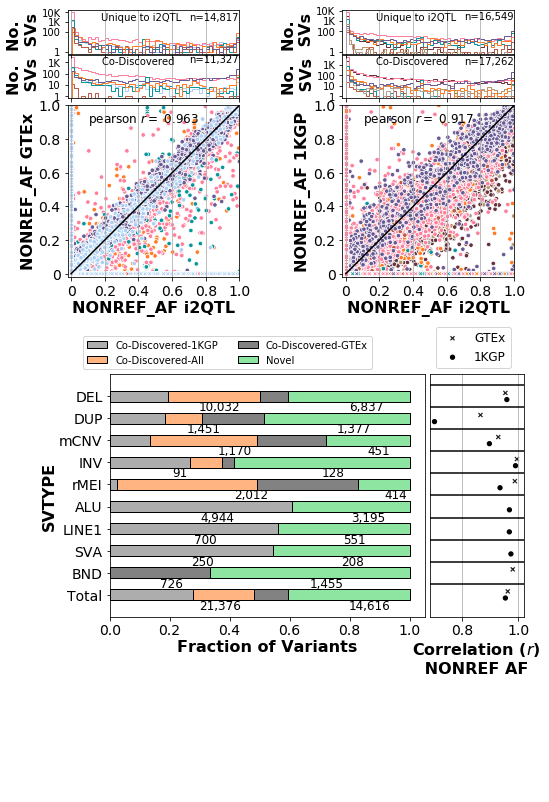

In [899]:
fig =plt.figure(figsize=(8,15))
gs = mpl.gridspec.GridSpec(2, 2, wspace = 0.6)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

ax3  = fig.add_subplot(gs[2:])
plot_intersection(intersect_data_gtex_i2QTL, unique_to_i2_gtex, shared_vars_gtex, corr_for_plot_gtex, ax = ax1)

intersect_data_kgp_i2QTL['MAF'] = intersect_data_kgp_i2QTL.MAF.astype(float)
intersect_data_kgp_i2QTL['MAF_i2QTL_unrel'] = intersect_data_kgp_i2QTL.MAF_i2QTL_unrel.astype(float)

ax = plot_intersection(intersect_data_kgp_i2QTL, unique_to_i2_kgp, shared_vars_kgp, corr_for_plot_kgp, label='1KGP', ax= ax2)

gs4 = mpl.gridspec.GridSpec(1, 2, width_ratios=[1, 0.3], wspace=-0.5)
ax6 =  fig.add_subplot(gs4[0])
ax7 =  fig.add_subplot(gs4[1])
colors = [ (0.6770011534025375, 0.6770011534025375, 0.6770011534025375) ,
          (1.0, 0.7058823529411765, 0.5098039215686274) ,
          (0.5085736255286428, 0.5085736255286428, 0.5085736255286428),
          (0.5529411764705883, 0.8980392156862745, 0.6313725490196078)]
ax3.set_axis_off()


ax = stacked_bar_plot_co_disc(frac_disc_gtex_1kgp, order_variants, ax6, colors = colors)
ax.set_ylim( -1, 10)
ax = corr_plot(ax7, corr_per_class_all, order_variants)
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_ylim( 10, -1)
ax.legend(bbox_to_anchor = [0,1], loc = 'lower left', fontsize=12)

order = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'STR']
colors = [color_dict[i] for i in order]
patches = mpltools.get_legend_patches(order, just_rect=True, rectfacecolor=colors)

# leg = ax1.legend(handles = patches, bbox_to_anchor = [0,1], loc = 'upper left', frameon= True, ncol=2, fontsize=8)
# leg.get_frame().set_facecolor('white')
# leg.get_frame().set_edgecolor('black')


gs4.tight_layout(fig, rect = [0.05, 0.2, 0.95, 0.55], w_pad=0)
fn = private_out + '/Comparison_with_Gtex_KGP.png'
fig.savefig(fn, dpi = 500, bbox_inches = 'tight')



# Playing with color Palettes

['INV', 'LINE1', 'SVA', 'rMEI', 'mCNV', 'STR', 'DUP', 'DEL', 'ALU', 'BND']


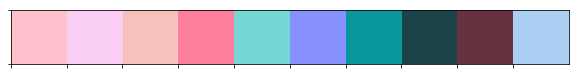

In [646]:
c = vapeplot.palette('macplus') + vapeplot.palette('mallsoft')

svtypes_ordered = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'BND', 'STR']

color_dict = dict(zip(svtypes_ordered, c))

sns.palplot(color_dict.values())
print color_dict.keys()

In [647]:
color_dict['DEL'] = color_dict['rMEI']

color_dict['rMEI'] = '#6b5b95'
color_dict['mCNV'] = "#ff7b25"
color_dict['INV'] = '#bc5a45'
color_dict['LINE1'] = '#b9936c'
color_dict['SVA'] = '#ada397'
color_dict['INDEL INS'] = '#618685'
color_dict['INDEL DEL'] = '#4040a1'
color_dict['SNV'] = 'black'

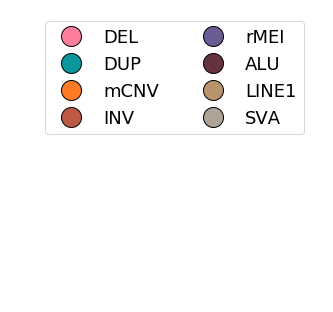

In [965]:
fig, ax = plt.subplots(1,1, figsize = (5,5))
order = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA']
colors = [color_dict[i] for i in order]
patches = mpltools.get_legend_patches(order, markerfacecolor=colors)

leg = ax.legend(handles = patches, bbox_to_anchor = [0,1], loc = 'upper left', frameon= True, ncol=2, fontsize=18)
ax.set_axis_off()
fn = private_out + '/legend_dots.png'
fig.savefig(fn, bbox_inches = 'tight')

In [948]:
color_dict['SNV'] = 'black'

In [949]:
color_pal_series = pd.Series(color_dict)

In [950]:
CM.save_dataframe('color_pal_series', color_pal_series, private_out)

color_pal_series = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/color_pal_series.pkl')
color_pal_series = pd.read_csv('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/color_pal_series.tsv', sep='\t')
# all vars recorded: /frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/load_saved_nb_variables.py
# pickled vars recorded:/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/load_pickled_nb_variables.py


In [684]:
indel_rr_by_length = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/snv_indel_info_replication/indel_rr_by_length.pkl')

indel_rr_by_length['log_num_total'] = indel_rr_by_length.num_total.apply(lambda x: np.log10(x))

In [723]:
total_indel_snv_counts = pd.read_table('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/snv_indel_info_replication/snv_indel_info_ipscore/variant_counts.tsv', names = ['Count', 'VARIANT_TYPE'])

total_snvs = total_indel_snv_counts[total_indel_snv_counts.VARIANT_TYPE == 'SNV']['Count']

snv_rr = 0.9752373203220291

In [951]:
color_pal_series = pd.read_pickle('/frazer01/projects/hipsci/analysis/i2QTL-sv-analysis/private_output/Figures_ASHG_Poster/color_pal_series.pkl')

In [952]:
color_dict = color_pal_series.to_dict()

(0.5, 0)


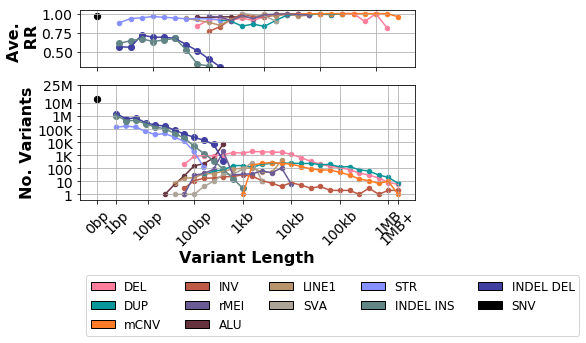

In [955]:
fig =plt.figure(figsize=(6, 3.5))
gs = mpl.gridspec.GridSpec(2, 1, height_ratios=[0.5, 1])

# ax = gs[0]
ax1 = fig.add_subplot(gs[0])

ax1 = plot_length_rr(ax1, rr_by_length_comb, rr_by_length_hipstr, color_dict, s = 20)
     
ax1.set_xlabel('')
ax1.set_xticklabels([])
order = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'STR']
colors = [color_dict[i] for i in order]
ax1.set_ylabel('Ave. \n RR')

ax1.set_ylim(0.7,1.02)

order = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'STR']
colors = [color_dict[i] for i in order]
patches = mpltools.get_legend_patches(order, just_rect=True, rectfacecolor=colors)



# gs.tight_layout(fig, rect=[0.05, 0.75, 0.5, 0.95], pad=0)


t = ax1.xaxis.get_label()
print t.get_position()
pos = t.get_position()

# gs = mpl.gridspec.GridSpec(1, 1)

# ax = gs[1]

ax2 = fig.add_subplot(gs[1])

ax2 = plot_length_number(combined_non_redun_info, info_dosage_hipstr, color_dict, ax = ax2, s= 20)

for i, df in indel_rr_by_length.groupby('SVTYPE'):
    df = df.sort_values('log_size_bins')
    
    
    ax2.plot(df.log_size_bins,df.log_num_total, color = color_dict[i])
    ax2.scatter(df.log_size_bins,df.log_num_total, color = color_dict[i])
    
    df = df[df.num_seg > 20]
    ax1.plot(df.log_size_bins,df.RR, color = color_dict[i])
    ax1.scatter(df.log_size_bins,df.RR, color = color_dict[i])
    

ax1.scatter(0, snv_rr, color = color_dict['SNV'], s = 40)
 
ax2.scatter(0, np.log10(total_snvs), color = color_dict['SNV'], s = 40)
    

ax1.set_ylim(0.3, 1.05)
ax1.set_yticks([0.5, 0.75, 1.0])

yticklabels = [1, 10, 100, 1000, 10000, 100000, 1000000, 10000000, 250000000]
yticks = np.log10(yticklabels)
yticklabel_mod = [1,10, 100, '1K', '10K', '100K', '1M', '10M', '25M']


ax2.set_yticks(yticks)
ax2.set_yticklabels(yticklabel_mod)
ax2.set_xlabel('Variant Length')

xticks = list(np.log10([1, 2.51188643150958, 11, 101, 1001, 10001, 100001, 1000001])) + [6.2]
xlabels = ['0bp','1bp', '10bp', '100bp', '1kb', '10kb', '100kb', '1MB', '1MB+']

ax2.set_xticks(xticks)
ax2.set_xticklabels(xlabels, rotation=45)

order = ['DEL', 'DUP', 'mCNV', 'INV', 'rMEI', 'ALU', 'LINE1', 'SVA', 'STR', 'INDEL INS', 'INDEL DEL', 'SNV']
colors = [color_dict[i] for i in order]
patches = mpltools.get_legend_patches(order, just_rect=True, rectfacecolor=colors)

leg = ax2.legend(handles = patches, bbox_to_anchor = [0,-0.6], loc = 'upper left', frameon= True, ncol=5, fontsize=12)

fn = private_out + '/RR_Length_Count'
fig.savefig(fn, dpi = 500, bbox_inches = 'tight')


# gs.tight_layout(fig, rect=[0.05, 0.58, 0.6, 0.8], pad=0, h_pad=0)


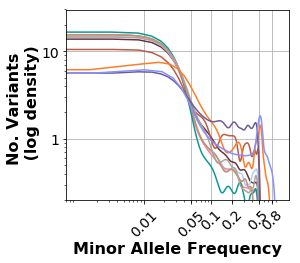

In [956]:
fig, ax  =plt.subplots(1,1 ,figsize=(4, 3.5))
ax = plot_maf(ax, combined_non_redun_info, info_dosage_hipstr)

fn = private_out + '/MAF_Categories.png'
fig.savefig(fn, bbox_inches = 'tight')